In [10]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [11]:
# global definitions

numTaps = 33
fSample = 44e3
fNyquist = fSample/2

# quantification
nBits = 16
nBitsFrac = 15

In [12]:
# bass filter 
fc_bass = 10
wc_bass = fc_bass/fNyquist
taps_bass = signal.firwin(numTaps,wc_bass, window='boxcar')


print(wc_bass)

0.00045454545454545455


In [13]:
# Quantify bass taps
tapsQ_bass = np.floor(taps_bass * 2**nBitsFrac) / 2**nBitsFrac
print(tapsQ_bass)
sum(tapsQ_bass)

[0.03027344 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344
 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344
 0.03027344 0.03027344 0.03027344 0.03027344 0.03030396 0.03027344
 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344
 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344 0.03027344
 0.03027344 0.03027344 0.03027344]


0.999053955078125

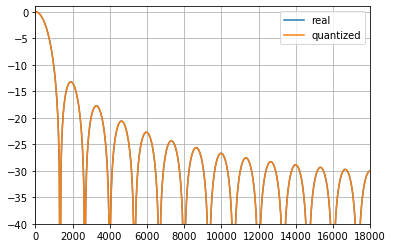

In [14]:
w_bass,h_bass = signal.freqz(taps_bass)
wQ_bass,hQ_bass = signal.freqz(tapsQ_bass)
plt.plot(w_bass/np.pi*fNyquist, 20 * np.log10(abs(h_bass)), label='real')
plt.plot(wQ_bass/np.pi*fNyquist, 20 * np.log10(abs(hQ_bass)), label='quantized')
plt.xlim(0,18000)
plt.ylim(-40,1)
plt.legend()
plt.grid()

<ipython-input-15-b9e3acd87f3f>:2: RuntimeWarning: divide by zero encountered in true_divide
  phase = np.arctan(np.imag(hQ_bass)/np.real(hQ_bass))


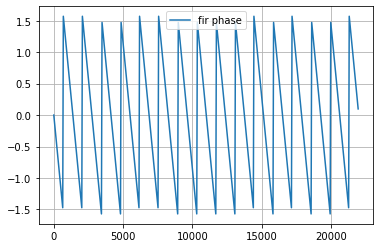

In [15]:
# fir filter phase
phase = np.arctan(np.imag(hQ_bass)/np.real(hQ_bass))
plt.plot(wQ_bass/np.pi*fNyquist, phase, label='fir phase')
plt.legend()
plt.grid()
plt.savefig("fir_phase.svg")

In [16]:
# bass instantiation template

for i in range (0, numTaps):
    if (taps_bass[i] >= 0):
        print(".b"+str(i)+"("+str(nBits)+"'d"+str(int(taps_bass[i]*2**nBitsFrac))+"),")
    else:
        print(".b"+str(i)+"(-"+str(nBits)+"'d"+str(int(abs(taps_bass[i])*2**nBitsFrac))+"),")


.b0(16'd992),
.b1(16'd992),
.b2(16'd992),
.b3(16'd992),
.b4(16'd992),
.b5(16'd992),
.b6(16'd992),
.b7(16'd992),
.b8(16'd992),
.b9(16'd992),
.b10(16'd992),
.b11(16'd992),
.b12(16'd992),
.b13(16'd992),
.b14(16'd992),
.b15(16'd992),
.b16(16'd993),
.b17(16'd992),
.b18(16'd992),
.b19(16'd992),
.b20(16'd992),
.b21(16'd992),
.b22(16'd992),
.b23(16'd992),
.b24(16'd992),
.b25(16'd992),
.b26(16'd992),
.b27(16'd992),
.b28(16'd992),
.b29(16'd992),
.b30(16'd992),
.b31(16'd992),
.b32(16'd992),


In [17]:
# mid filter 

fc1_mid = 800
wc1_mid = fc1_mid/fNyquist
fc2_mid = 3000
wc2_mid = fc2_mid/fNyquist
taps_mid = signal.firwin(numTaps,[wc1_mid, wc2_mid], window='hamming', pass_zero=False)

In [18]:
# Quantify mid taps
tapsQ_mid = np.floor(taps_mid * 2**nBitsFrac) / 2**nBitsFrac
print(tapsQ_mid)
sum(tapsQ_mid)

[-0.00094604 -0.00219727 -0.00457764 -0.00869751 -0.01470947 -0.02194214
 -0.02877808 -0.03286743 -0.03149414 -0.02249146 -0.00479126  0.02075195
  0.05154419  0.08325195  0.11090088  0.12976074  0.13644409  0.12976074
  0.11090088  0.08325195  0.05154419  0.02075195 -0.00479126 -0.02249146
 -0.03149414 -0.03286743 -0.02877808 -0.02194214 -0.01470947 -0.00869751
 -0.00457764 -0.00219727 -0.00094604]


0.581878662109375

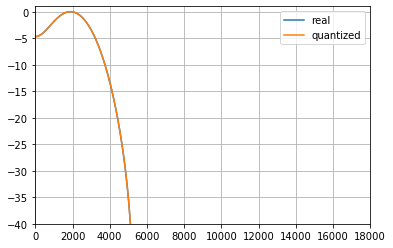

In [19]:
w_mid,h_mid = signal.freqz(taps_mid)
wQ_mid,hQ_mid = signal.freqz(tapsQ_mid)
plt.plot(w_mid/np.pi*fNyquist, 20 * np.log10(abs(h_mid)), label='real')
plt.plot(wQ_mid/np.pi*fNyquist, 20 * np.log10(abs(hQ_mid)), label='quantized')
plt.xlim(0,18000)
plt.ylim(-40,1)
plt.legend()
plt.grid()

In [20]:
# mid instantiation template

for i in range (0, numTaps):
    if (taps_mid[i] >= 0):
        print(".b"+str(i)+"("+str(nBits)+"'d"+str(int(taps_mid[i]*2**nBitsFrac))+"),")
    else:
        print(".b"+str(i)+"(-"+str(nBits)+"'d"+str(int(abs(taps_mid[i])*2**nBitsFrac))+"),")

.b0(-16'd30),
.b1(-16'd71),
.b2(-16'd149),
.b3(-16'd284),
.b4(-16'd481),
.b5(-16'd718),
.b6(-16'd942),
.b7(-16'd1076),
.b8(-16'd1031),
.b9(-16'd736),
.b10(-16'd156),
.b11(16'd680),
.b12(16'd1689),
.b13(16'd2728),
.b14(16'd3634),
.b15(16'd4252),
.b16(16'd4471),
.b17(16'd4252),
.b18(16'd3634),
.b19(16'd2728),
.b20(16'd1689),
.b21(16'd680),
.b22(-16'd156),
.b23(-16'd736),
.b24(-16'd1031),
.b25(-16'd1076),
.b26(-16'd942),
.b27(-16'd718),
.b28(-16'd481),
.b29(-16'd284),
.b30(-16'd149),
.b31(-16'd71),
.b32(-16'd30),


In [21]:
# treble filter 

fc1_treb = 2000
wc1_treb = fc1_treb/fNyquist
fc2_treb = 8000
wc2_treb = fc2_treb/fNyquist
taps_treb = signal.firwin(numTaps,[wc1_treb, wc2_treb], window='hanning', pass_zero=False)

In [22]:
# Quantify treble taps
tapsQ_treb = np.floor(taps_treb * 2**nBitsFrac) / 2**nBitsFrac
print(tapsQ_treb)
sum(tapsQ_treb)

[ 0.00000000e+00 -3.05175781e-05  3.96728516e-04  2.62451172e-03
  4.57763672e-03 -3.05175781e-05 -1.15966797e-02 -1.82800293e-02
 -9.33837891e-03  2.13623047e-03 -1.63269043e-02 -7.49816895e-02
 -1.27655029e-01 -9.97314453e-02  3.25622559e-02  1.95800781e-01
  2.69775391e-01  1.95800781e-01  3.25622559e-02 -9.97314453e-02
 -1.27655029e-01 -7.49816895e-02 -1.63269043e-02  2.13623047e-03
 -9.33837891e-03 -1.82800293e-02 -1.15966797e-02 -3.05175781e-05
  4.57763672e-03  2.62451172e-03  3.96728516e-04 -3.05175781e-05
  0.00000000e+00]


0.030029296875

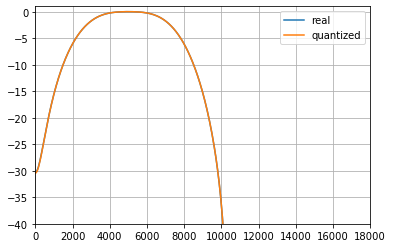

In [23]:
w_treb,h_treb = signal.freqz(taps_treb)
wQ_treb,hQ_treb = signal.freqz(tapsQ_treb)
plt.plot(w_treb/np.pi*fNyquist, 20 * np.log10(abs(h_treb)), label='real')
plt.plot(wQ_treb/np.pi*fNyquist, 20 * np.log10(abs(hQ_treb)), label='quantized')
plt.xlim(0,18000)
plt.ylim(-40,1)
plt.legend()
plt.grid()

In [24]:
# treble instantiation template

for i in range (0, numTaps):
    if (taps_treb[i] >= 0):
        print(".b"+str(i)+"("+str(nBits)+"'d"+str(int(taps_treb[i]*2**nBitsFrac))+"),")
    else:
        print(".b"+str(i)+"(-"+str(nBits)+"'d"+str(int(abs(taps_treb[i])*2**nBitsFrac))+"),")

.b0(16'd0),
.b1(-16'd0),
.b2(16'd13),
.b3(16'd86),
.b4(16'd150),
.b5(-16'd0),
.b6(-16'd379),
.b7(-16'd598),
.b8(-16'd305),
.b9(16'd70),
.b10(-16'd534),
.b11(-16'd2456),
.b12(-16'd4182),
.b13(-16'd3267),
.b14(16'd1067),
.b15(16'd6416),
.b16(16'd8840),
.b17(16'd6416),
.b18(16'd1067),
.b19(-16'd3267),
.b20(-16'd4182),
.b21(-16'd2456),
.b22(-16'd534),
.b23(16'd70),
.b24(-16'd305),
.b25(-16'd598),
.b26(-16'd379),
.b27(-16'd0),
.b28(16'd150),
.b29(16'd86),
.b30(16'd13),
.b31(-16'd0),
.b32(16'd0),


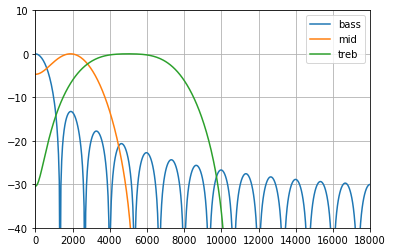

In [25]:
# entire equalizer bode
plt.plot(wQ_bass/np.pi*fNyquist, 20 * np.log10(abs(hQ_bass)), label='bass')
plt.plot(wQ_mid/np.pi*fNyquist, 20 * np.log10(abs(hQ_mid)), label='mid')
plt.plot(wQ_treb/np.pi*fNyquist, 20 * np.log10(abs(hQ_treb)), label='treb')
plt.xlim(0,18000)
plt.ylim(-40,10)
plt.legend()
plt.grid()
plt.savefig("audio_equalizer_fir_bode.svg")